# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [4]:
char_csv=pd.read_csv(characterization_path/'12-ago-2021'/'curvelet_abide_adults_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'12-ago-2021'/'curvelet_abide_adults_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [5]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [6]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1,left amygdala,29007,1,ABIDE-II,BNI_1,41.0,0.557871,0.690344,1.012178,...,2.035835e-18,0.057376,0.866423,-6.867674e-19,0.042953,0.802193,-0.003499,0.038032,0.887047,-4.255454e-20
1,2,right amygdala,29007,1,ABIDE-II,BNI_1,41.0,2.275323,0.978121,1.987550,...,-3.898915e-03,0.051616,0.786646,-7.930164e-19,0.054675,0.932989,-0.007144,0.040141,0.986664,9.935846e-09
2,3,"left cingulate gyrus, anterior division",29007,1,ABIDE-II,BNI_1,41.0,0.076542,0.378076,1.474529,...,-8.904313e-04,0.000135,0.255093,4.186727e-19,0.000227,0.273631,0.000829,0.000191,0.274288,3.302773e-08
3,4,"right cingulate gyrus, anterior division",29007,1,ABIDE-II,BNI_1,41.0,0.032629,0.360944,0.858256,...,2.962149e-04,0.000029,0.231906,1.919808e-19,0.000033,0.237522,-0.001920,0.000017,0.226239,-2.525294e-07
4,5,"right supramarginal gyrus, anterior division",29007,1,ABIDE-II,BNI_1,41.0,0.156430,0.522836,0.584145,...,2.259671e-18,0.008806,0.488865,-5.329412e-20,0.008255,0.484275,-0.000398,0.006960,0.487501,-1.428503e-07


In [7]:
display(char_csv.query('region_name=="Amygdala_L"'))

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243


In [8]:
def filter_bad_1(bad_str):
    s = bad_str.split('characterization issue on region')
    if len(s)>1:
        return int(s[1])
    else:
        return 54

In [9]:
bad_log_csv['region_issue'] = [filter_bad_1(stri) for stri in bad_log_csv['bad_log_cell1'].values]

In [10]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue


In [11]:
int_regions = [i+1 for i in range(13)]
bad_log_final = bad_log_csv[bad_log_csv['region_issue'].isin(int_regions)]
display(bad_log_final)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue


In [12]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_final['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

region_list = regions

#region_list=['Amygdala_L', 'Amygdala_R', 'Frontal_Sup_2_R', 'Frontal_Mid_2_R', 'Frontal_Sup_Medial_R',
#            'Cingulate_Mid_L', 'ACC_pre_L', 'ACC_sup_L', 'Frontal_Sup_2_L', 'Frontal_Mid_2_L', 'Frontal_Sup_Medial_L',
#            'Supp_Motor_Area_L', 'Cingulate_Mid_R', 'ACC_pre_R', 'ACC_sup_R', 'SupraMarginal_R', 'Frontal_Med_Orb_L', 
#             'Rectus_L', 'Frontal_Med_Orb_R', 'Rectus_R', 'Parietal_Inf_L', 'Angular_L', 'Temporal_Sup_L', 'Fusiform_R']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

region_idx=int_regions
print('len region list: ', len(region_list))  
print('len region idx: ', len(region_idx)) 

#region_list=['left frontal medial cortex']
#region_idx=[49]

[50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353]


,region
index,
1,left amygdala
2,right amygdala
3,"left cingulate gyrus, anterior division"
4,"right cingulate gyrus, anterior division"
5,"right supramarginal gyrus, anterior division"
6,"left superior temporal gyrus, anterior division"
7,"Right temporal fusiform cortex, anterior division"
8,Left frontal pole
9,Right frontal pole


len region list:  13
len region idx:  13


In [13]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [14]:
colors=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff']]

colors=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#d5a18e', '#dec3be'],
        ['#13505b', '#040404'],
        ['#e26d5c','#723d46'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9']]

In [15]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [16]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [17]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [18]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1296
326
ninos:  337
ninos ASD:  167
ninos control:  170
(326, 261)
{'ASD': 159, 'CONTROL': 167}
{'ASD': 159, 'CONTROL': 167}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,4,"right cingulate gyrus, anterior division",29588,1,ABIDE-II,IP_1,19.7100,0.048947,0.394484,0.749571,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,19.7100,1.0
1,4,"right cingulate gyrus, anterior division",29595,1,ABIDE-II,IP_1,27.3600,0.169618,0.464164,1.119009,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,27.3600,1.0
2,4,"right cingulate gyrus, anterior division",29627,1,ABIDE-II,IP_1,21.1200,0.064341,0.399487,0.914836,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,21.1200,1.0
3,4,"right cingulate gyrus, anterior division",29580,2,ABIDE-II,IP_1,24.2600,0.169884,0.465773,1.072952,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,24.2600,0.0
4,4,"right cingulate gyrus, anterior division",29583,2,ABIDE-II,IP_1,22.4600,0.146200,0.465202,0.977530,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,22.4600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,4,"right cingulate gyrus, anterior division",50508,1,ABIDE-I,USM,26.3792,0.037670,0.359144,0.983680,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,26.3792,1.0
322,4,"right cingulate gyrus, anterior division",50514,1,ABIDE-I,USM,21.4018,0.107826,0.414713,1.239207,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,21.4018,1.0
323,4,"right cingulate gyrus, anterior division",50525,1,ABIDE-I,USM,32.8487,0.010259,0.303766,0.937554,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,32.8487,1.0
324,4,"right cingulate gyrus, anterior division",50529,1,ABIDE-I,USM,42.3354,0.002587,0.264928,0.813223,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,42.3354,1.0


datos de ASD: mean: 0.005774430384918533  std: 1.0708214350241283
datos de Control: mean: -0.0054978109652822705  std: 0.9275263019001448


(array([ 4.,  5.,  3.,  4.,  8.,  3.,  5.,  8.,  6., 10., 13.,  9., 10.,
        13., 14.,  9.,  4.,  7.,  8.,  1.,  4.,  2.,  5.,  3.,  2.,  2.,
         2.,  2.,  0.,  1.]),
 array([-1.82600631, -1.6820815 , -1.53815669, -1.39423188, -1.25030707,
        -1.10638226, -0.96245745, -0.81853264, -0.67460783, -0.53068302,
        -0.38675821, -0.2428334 , -0.09890859,  0.04501622,  0.18894103,
         0.33286584,  0.47679065,  0.62071546,  0.76464028,  0.90856509,
         1.0524899 ,  1.19641471,  1.34033952,  1.48426433,  1.62818914,
         1.77211395,  1.91603876,  2.05996357,  2.20388838,  2.34781319,
         2.491738  ]),
 <a list of 30 Patch objects>)

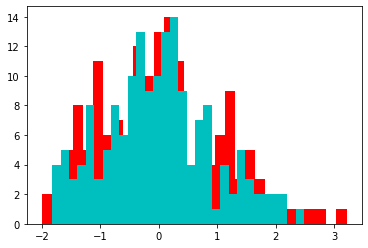

In [19]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==4]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in discard_q_csv['ID'].values:
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

print(len(np.unique(features_merge['subject_id'])))

print('ninos: ', len(phen_csv.query('EDAD>=19')))
print('ninos ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
print('ninos control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

#pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv('adults_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [20]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['BNI_1', 'ETH_1', 'IP_1', 'IU_1', 'KUL_3', 'NYU_1', 'ONRC_2',
       'TCD_1', 'USM_1', 'Caltech', 'CMU', 'Leuven', 'MaxMun', 'NYU',
       'Olin', 'Pitt', 'SBL', 'Trinity', 'UM', 'USM'], dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [21]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [22]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [23]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [24]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [25]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [26]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

In [27]:
#map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [28]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx].dropna()
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    print(features_merge)
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+'/results/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+'/results/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+'/results/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+'/results/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+'/results/'+region_name):
        os.makedirs(os.getcwd()+'/results/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+'/results/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

left amygdala
     region_index    region_name  subject_id  dx_group   dataset site_id  \
0               1  left amygdala       29588         1  ABIDE-II    IP_1   
1               1  left amygdala       29595         1  ABIDE-II    IP_1   
2               1  left amygdala       29627         1  ABIDE-II    IP_1   
3               1  left amygdala       29580         2  ABIDE-II    IP_1   
4               1  left amygdala       29583         2  ABIDE-II    IP_1   
..            ...            ...         ...       ...       ...     ...   
321             1  left amygdala       50508         1   ABIDE-I     USM   
322             1  left amygdala       50514         1   ABIDE-I     USM   
323             1  left amygdala       50525         1   ABIDE-I     USM   
324             1  left amygdala       50529         1   ABIDE-I     USM   
325             1  left amygdala       50531         1   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GR

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:03<00:00,  3.80it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0062421301306679715
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.006119009099248985
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.10064617143189436
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07409011031244364
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05274487289317983
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.2989964355761078
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.35557415380683044
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3701260632384785
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.5
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3529501007981395
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.13405702385385088
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.5
caracteristica numero: 13
sub-banda: 5
t-test: 0.34707466643263285
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3512046004559244
caracteristica numero: 15
sub-banda: 5
t-test: 0.7101220417295662
caracteristi

caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.2740092129640314
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.028808832090079922
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.21648312824356114
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.24618286173054083
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3296606462484462
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.3857652770744215
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.443906483913462
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2981917695932558
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.21510619065501752
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.32372455586124843
caracteristica numero: 177
sub-banda: 59
t-test: 0.5704181550949867
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.12536827920873878
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.14262017016139256
caracteristica numero: 180
sub-banda: 60
t-test: 0.9477702723607784
caracteristica nu

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

right amygdala
     region_index     region_name  subject_id  dx_group   dataset site_id  \
0               2  right amygdala       29588         1  ABIDE-II    IP_1   
1               2  right amygdala       29595         1  ABIDE-II    IP_1   
2               2  right amygdala       29627         1  ABIDE-II    IP_1   
3               2  right amygdala       29580         2  ABIDE-II    IP_1   
4               2  right amygdala       29583         2  ABIDE-II    IP_1   
..            ...             ...         ...       ...       ...     ...   
321             2  right amygdala       50508         1   ABIDE-I     USM   
322             2  right amygdala       50514         1   ABIDE-I     USM   
323             2  right amygdala       50525         1   ABIDE-I     USM   
324             2  right amygdala       50529         1   ABIDE-I     USM   
325             2  right amygdala       50531         1   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   D

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.47328716674188476
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.30949607977213023
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.14744362134792133
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4592682913512983
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4616017309869613
caracteristica numero: 6
sub-banda: 2
t-test: 0.5338362342119272
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.33821546812431075
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.23053021300228033
caracteristica numero: 9
sub-banda: 3
t-test: 0.7207138542102084
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12682917248512193
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.09516229072019594
caracteristica numero: 12
sub-banda: 4
t-test: 0.7207138542102083
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.01905079479243992
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.08952077583657203
caracteristica numero: 15
sub-banda: 5
t-test: 0.98333

wilcoxon: 0.3862149895085686
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.026205526553568136
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.3617234380221699
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.498593012078501
caracteristica numero: 177
sub-banda: 59
t-test: 0.3333572405440023
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.2144196329428626
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.3943354079761783
caracteristica numero: 180
sub-banda: 60
t-test: 0.40040068938421935
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.1305331222345285
caracteristica numero: 182
sub-banda: 61
t-test: 0.5447389319517901
caracteristica numero: 183
sub-banda: 61
t-test: 0.8178996496730173
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.23160389270784587
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.3178329614850637
caracteristica numero: 186
sub-banda: 62
t-test: 0.8178996496730149
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.351640683088094

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

left cingulate gyrus, anterior division
     region_index                              region_name  subject_id  \
0               3  left cingulate gyrus, anterior division       29588   
1               3  left cingulate gyrus, anterior division       29595   
2               3  left cingulate gyrus, anterior division       29627   
3               3  left cingulate gyrus, anterior division       29580   
4               3  left cingulate gyrus, anterior division       29583   
..            ...                                      ...         ...   
321             3  left cingulate gyrus, anterior division       50508   
322             3  left cingulate gyrus, anterior division       50514   
323             3  left cingulate gyrus, anterior division       50525   
324             3  left cingulate gyrus, anterior division       50529   
325             3  left cingulate gyrus, anterior division       50531   

     dx_group   dataset site_id      age    curv_1    curv_2    curv_3 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.47it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1463624088093028
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1842371863768092
caracteristica numero: 3
sub-banda: 1
t-test: 0.16756437554159695
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.18738369169531782
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2919042950539733
caracteristica numero: 6
sub-banda: 2
t-test: 0.3423640300300068
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4522767054554156
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3343551319423166
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.24507263456849615
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.35513633198991734
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.24618286173054083
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.24507263456849615
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4681421427720598
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.34079853841858254
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.072

caracteristica numero: 180
sub-banda: 60
t-test: 0.34413310116291296
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.17651586386776974
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.15460172201391265
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.05598364042483061
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.05261848145543612
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.04858076955594819
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.05598364042483061
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.37635764315677334
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.39297870611846425
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.3041288566660083
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.09358048961161075
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.09299234737506135
caracteristica numero: 192
sub-banda: 64
t-test: 0.4629276298932554
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.4929654103881217
caracteristic

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

right cingulate gyrus, anterior division
     region_index                               region_name  subject_id  \
0               4  right cingulate gyrus, anterior division       29588   
1               4  right cingulate gyrus, anterior division       29595   
2               4  right cingulate gyrus, anterior division       29627   
3               4  right cingulate gyrus, anterior division       29580   
4               4  right cingulate gyrus, anterior division       29583   
..            ...                                       ...         ...   
321             4  right cingulate gyrus, anterior division       50508   
322             4  right cingulate gyrus, anterior division       50514   
323             4  right cingulate gyrus, anterior division       50525   
324             4  right cingulate gyrus, anterior division       50529   
325             4  right cingulate gyrus, anterior division       50531   

     dx_group   dataset site_id      age    curv_1    curv

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.43it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.498593012078501
caracteristica numero: 2
sub-banda: 1
t-test: 0.9847179277450914
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4300133602009868
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.29230807060891184
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3665802885290757
caracteristica numero: 6
sub-banda: 2
t-test: 0.5594719310629905
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.29230807060891184
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2359263628213079
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.043261950990792525
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2874800065934432
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.21717350521634993
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.043261950990792525
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3211940629967742
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.38486631324217074
caracteristica numero: 15
sub-banda: 5
t-test: 0.65437

caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.19636916568578933
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.2076244608790066
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.10549652564813827
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.09456682350408291
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.046485094682868405
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.3178329614850637
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.298803512056196
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.28508019966344
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.4962480797411913
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.4868704565675095
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.08782156152738252
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.4536739097285171
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.477968354250673
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.39478792783923006
caracteristica nu

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

right supramarginal gyrus, anterior division
     region_index                                   region_name  subject_id  \
0               5  right supramarginal gyrus, anterior division       29588   
1               5  right supramarginal gyrus, anterior division       29595   
2               5  right supramarginal gyrus, anterior division       29627   
3               5  right supramarginal gyrus, anterior division       29580   
4               5  right supramarginal gyrus, anterior division       29583   
..            ...                                           ...         ...   
321             5  right supramarginal gyrus, anterior division       50508   
322             5  right supramarginal gyrus, anterior division       50514   
323             5  right supramarginal gyrus, anterior division       50525   
324             5  right supramarginal gyrus, anterior division       50529   
325             5  right supramarginal gyrus, anterior division       50531   

     d

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.12682917248512193
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.11162668553795008
caracteristica numero: 3
sub-banda: 1
t-test: 0.3549406210692473
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.16401242482776285
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.055851145310472715
caracteristica numero: 6
sub-banda: 2
t-test: 0.14946436911352196
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.058274198531536446
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.029354485799241346
caracteristica numero: 9
sub-banda: 3
t-test: 0.19517729383222568
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0383256776746435
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.01362985217568055
quartiles
[1, 2]
[-0.7872461758217218, 0.5656582302695518]
caracteristica numero: 12
sub-banda: 4
t-test: 0.19517729383222585
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0602152789222402
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0935804896

caracteristica numero: 117
sub-banda: 39
t-test: 0.3059778529153105
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.0278178450703607
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.023867944431164485
caracteristica numero: 120
sub-banda: 40
t-test: 0.5484550670379329
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.048108653234058475
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.04881821294654087
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4775000840877337
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.15404307953056173
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.2116861757352831
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.0829580812594029
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.09920277344208878
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.12391917350486276
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.040120080667972034
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.04304648886112024
caracteristic

quartiles
[2, 1]
[-0.044898245252776824, -0.03214064152403438]


  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

left superior temporal gyrus, anterior division
     region_index                                      region_name  \
0               6  left superior temporal gyrus, anterior division   
1               6  left superior temporal gyrus, anterior division   
2               6  left superior temporal gyrus, anterior division   
3               6  left superior temporal gyrus, anterior division   
4               6  left superior temporal gyrus, anterior division   
..            ...                                              ...   
321             6  left superior temporal gyrus, anterior division   
322             6  left superior temporal gyrus, anterior division   
323             6  left superior temporal gyrus, anterior division   
324             6  left superior temporal gyrus, anterior division   
325             6  left superior temporal gyrus, anterior division   

     subject_id  dx_group   dataset site_id      age    curv_1    curv_2  \
0         29588         1  ABIDE-II

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.06336736408623167
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.04671430253620148
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.36569560758416897
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.023085902489816464
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0705303619414312
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.13266332302124173
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09797767217975528
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.16198578689835663
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.17988768970125812
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.016529557472521474
quartiles
[1, 2]
[-0.6637894539615333, 0.3356069605148269]
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.012830939358272325
quartiles
[1, 2]
[-0.6322250878482043, 0.31778876456884925]
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.17988768970125812
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.071007892

caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.08322786497320156
caracteristica numero: 108
sub-banda: 36
t-test: 0.3185045017389282
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.04729129033403613
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.10984977120074818
caracteristica numero: 111
sub-banda: 37
t-test: 0.06330558061501229
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0188875401503514
quartiles
[1, 2]
[-0.7859910650572812, 0.37008140368210274]
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.018141333545951304
quartiles
[1, 1]
[-0.854565658745067, 0.6238572440392621]
caracteristica numero: 114
sub-banda: 38
t-test: 0.06330558061501207
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.0939741076419362
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.17318429059223417
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.4880423606147737
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.03255384411698031
caracteristica numero: 119
sub-banda: 4

caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.016384939903958298
quartiles
[1, 2]
[-0.7769843922850928, 0.7962618321617967]
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.40068337798215087
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.009415725233575116
quartiles
[1, 2]
[-0.7083076669767787, 0.4722198504798375]
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.012333647965959161
quartiles
[1, 2]
[-0.8005351623910827, 0.697672712520336]
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.362163010993075
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.01222128873180511
quartiles
[1, 2]
[-0.7426320849198703, 0.5420270221135937]
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.013466720593152839
quartiles
[1, 2]
[-0.7615029860575859, 0.7971290792861111]
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.31469466444614314
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.011672701745885392
quartiles
[1, 2]
[-0.6997972922977881, 0.45733412131048434]
cara

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right temporal fusiform cortex, anterior division
     region_index                                        region_name  \
0               7  Right temporal fusiform cortex, anterior division   
1               7  Right temporal fusiform cortex, anterior division   
2               7  Right temporal fusiform cortex, anterior division   
3               7  Right temporal fusiform cortex, anterior division   
4               7  Right temporal fusiform cortex, anterior division   
..            ...                                                ...   
321             7  Right temporal fusiform cortex, anterior division   
322             7  Right temporal fusiform cortex, anterior division   
323             7  Right temporal fusiform cortex, anterior division   
324             7  Right temporal fusiform cortex, anterior division   
325             7  Right temporal fusiform cortex, anterior division   

     subject_id  dx_group   dataset site_id      age    curv_1    curv_2  \
0        

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.48it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2704963510032955
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.23017293891642648
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.23883253240618324
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3582050699076106
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.21959981725055877
caracteristica numero: 6
sub-banda: 2
t-test: 0.8536275918799348
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.33349963522037895
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3275355932878699
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.13609976890283265
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.34555353296370245
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.37993318932394504
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.13609976890283265
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11917364338133607
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.03187510373221007
caracteristica numero: 15
sub-banda: 5
t-test: 0.

caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.4466939669635719
caracteristica numero: 177
sub-banda: 59
t-test: 0.5904657284929566
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.33821546812431075
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.42862850951335496
caracteristica numero: 180
sub-banda: 60
t-test: 0.632038932855179
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.4611349346969335
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.464870750504931
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.13380316970228567
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.34598702994865593
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.43648711768741805
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.13380316970228567
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.49062092523520273
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.2693304176842687
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.45181107206485205
caracteristica num

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left frontal pole
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0               8  Left frontal pole       29588         1  ABIDE-II    IP_1   
1               8  Left frontal pole       29595         1  ABIDE-II    IP_1   
2               8  Left frontal pole       29627         1  ABIDE-II    IP_1   
3               8  Left frontal pole       29580         2  ABIDE-II    IP_1   
4               8  Left frontal pole       29583         2  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
321             8  Left frontal pole       50508         1   ABIDE-I     USM   
322             8  Left frontal pole       50514         1   ABIDE-I     USM   
323             8  Left frontal pole       50525         1   ABIDE-I     USM   
324             8  Left frontal pole       50529         1   ABIDE-I     USM   
325             8  Left frontal pole       50531         1   ABIDE-I     USM   

         age    curv_

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.43it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.09163064959989248
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.07642586115590712
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4616017309869613
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2643073379260869
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.29311640003310757
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4746911630567319
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.24729578037340105
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2963600374586288
caracteristica numero: 9
sub-banda: 3
t-test: 0.31280176360937456
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.13482057084024218
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16870622989449574
caracteristica numero: 12
sub-banda: 4
t-test: 0.312801763609374
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.21476275239239523
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.24065878479358999
caracteristica numero: 15
sub-banda: 5
t-test: 0.5507

caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.19377561456551545
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.18801695614601405
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.25629512290717316
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.09299234737506135
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.08744724680940819
caracteristica numero: 153
sub-banda: 51
t-test: 0.3109566587461585
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4148310395503183
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.4676746640813044
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.39297870611846425
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.30207564102071793
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.24990301595628084
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.15854966742336796
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.39569339294793304
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.3472887305611509
caracteristi

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right frontal pole
     region_index         region_name  subject_id  dx_group   dataset site_id  \
0               9  Right frontal pole       29588         1  ABIDE-II    IP_1   
1               9  Right frontal pole       29595         1  ABIDE-II    IP_1   
2               9  Right frontal pole       29627         1  ABIDE-II    IP_1   
3               9  Right frontal pole       29580         2  ABIDE-II    IP_1   
4               9  Right frontal pole       29583         2  ABIDE-II    IP_1   
..            ...                 ...         ...       ...       ...     ...   
321             9  Right frontal pole       50508         1   ABIDE-I     USM   
322             9  Right frontal pole       50514         1   ABIDE-I     USM   
323             9  Right frontal pole       50525         1   ABIDE-I     USM   
324             9  Right frontal pole       50529         1   ABIDE-I     USM   
325             9  Right frontal pole       50531         1   ABIDE-I     USM   

        

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.46it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1829878451782529
caracteristica numero: 2
sub-banda: 1
t-test: 0.3889371371091057
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1493485909490449
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.13431120870812396
caracteristica numero: 5
sub-banda: 2
t-test: 0.41969769307387084
caracteristica numero: 6
sub-banda: 2
t-test: 0.26577296564357367
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.19056320036646823
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.20527654404377416
caracteristica numero: 9
sub-banda: 3
t-test: 0.5279617428940206
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.33864545543408997
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3438215745758323
caracteristica numero: 12
sub-banda: 4
t-test: 0.5279617428940198
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.23160389270784587
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.23992737307242307
caracteristica numero: 15
sub-banda: 5
t-test: 0.6112161513

caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.1386830221957447
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.3670228953074326
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.36569560758416897
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.2521493483236608
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.3683517743738498
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.35207696103314484
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.2521493483236608
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.3074268660864018
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.2838838882797118
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.31993191348301286
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.4148310395503183
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.37368291040837665
caracteristica numero: 192
sub-banda: 64
t-test: 0.12560351152494142
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.3781441116765165
caracteristica nu

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left angular gyrus
     region_index         region_name  subject_id  dx_group   dataset site_id  \
0              10  Left angular gyrus       29588         1  ABIDE-II    IP_1   
1              10  Left angular gyrus       29595         1  ABIDE-II    IP_1   
2              10  Left angular gyrus       29627         1  ABIDE-II    IP_1   
3              10  Left angular gyrus       29580         2  ABIDE-II    IP_1   
4              10  Left angular gyrus       29583         2  ABIDE-II    IP_1   
..            ...                 ...         ...       ...       ...     ...   
321            10  Left angular gyrus       50508         1   ABIDE-I     USM   
322            10  Left angular gyrus       50514         1   ABIDE-I     USM   
323            10  Left angular gyrus       50525         1   ABIDE-I     USM   
324            10  Left angular gyrus       50529         1   ABIDE-I     USM   
325            10  Left angular gyrus       50531         1   ABIDE-I     USM   

        

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.33907565316288757
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2732266324253948
caracteristica numero: 3
sub-banda: 1
t-test: 0.397062029942188
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.49484117737545924
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3692385706032938
caracteristica numero: 6
sub-banda: 2
t-test: 0.6706449224501334
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.27479289963320275
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.09858882978699068
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0009559511818736477
quartiles
[2, 1]
[-0.9256723653719953, 0.7797386646671063]
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08596189114770414
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.02098639972083813
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0009559511818736477
quartiles
[2, 1]
[-0.9256723653719947, 0.7797386646671063]
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11095794792461289

caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.11512771545195355
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.11319827497164525
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.19604382588089797
caracteristica numero: 129
sub-banda: 43
t-test: 0.39932428226041605
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.2643073379260869
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.48031012895965486
caracteristica numero: 132
sub-banda: 44
t-test: 0.25082876619821065
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.29839563096797733
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.3821731509022905
caracteristica numero: 135
sub-banda: 45
t-test: 0.6154555470749777
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.3174138697322214
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.49484117737545924
caracteristica numero: 138
sub-banda: 46
t-test: 0.6154555470749762
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.342956820149512
caracteristica numero

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left frontal medial cortex
     region_index                 region_name  subject_id  dx_group   dataset  \
0              11  Left frontal medial cortex       29588         1  ABIDE-II   
1              11  Left frontal medial cortex       29595         1  ABIDE-II   
2              11  Left frontal medial cortex       29627         1  ABIDE-II   
3              11  Left frontal medial cortex       29580         2  ABIDE-II   
4              11  Left frontal medial cortex       29583         2  ABIDE-II   
..            ...                         ...         ...       ...       ...   
321            11  Left frontal medial cortex       50508         1   ABIDE-I   
322            11  Left frontal medial cortex       50514         1   ABIDE-I   
323            11  Left frontal medial cortex       50525         1   ABIDE-I   
324            11  Left frontal medial cortex       50529         1   ABIDE-I   
325            11  Left frontal medial cortex       50531         1   ABIDE-I   



100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2943308340624013
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.29839563096797733
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.48827676407565446
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.34122978084805144
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.49953100316194016
caracteristica numero: 6
sub-banda: 2
t-test: 0.8924488964290176
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3078402216692176
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1839243544941906
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.45274237541922696
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4620685801806474
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3812766882651591
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.45274237541922696
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.07245538758163361
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.11433046226215215
caracteristica numero: 15
sub-banda: 5
t-test: 0.90

caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.05440997374644349
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.03229793245164871
caracteristica numero: 177
sub-banda: 59
t-test: 0.6456926533773988
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.13431120870812396
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.10984977120074818
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.04229917633670199
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.13279105851346223
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.10379062715924148
caracteristica numero: 183
sub-banda: 61
t-test: 0.6234705445988227
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.19571881324336743
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.14209089378251444
caracteristica numero: 186
sub-banda: 62
t-test: 0.6234705445988222
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.14501839698375674
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.1129728007244698
caracteristica n

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right frontal medial cortex
     region_index                  region_name  subject_id  dx_group  \
0              12  Right frontal medial cortex       29588         1   
1              12  Right frontal medial cortex       29595         1   
2              12  Right frontal medial cortex       29627         1   
3              12  Right frontal medial cortex       29580         2   
4              12  Right frontal medial cortex       29583         2   
..            ...                          ...         ...       ...   
321            12  Right frontal medial cortex       50508         1   
322            12  Right frontal medial cortex       50514         1   
323            12  Right frontal medial cortex       50525         1   
324            12  Right frontal medial cortex       50529         1   
325            12  Right frontal medial cortex       50531         1   

      dataset site_id      age    curv_1    curv_2    curv_3  ...  SITE_ID  \
0    ABIDE-II    IP_1  19.710

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.48it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4639364932031494
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3821731509022905
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.07608879364388249
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3781441116765165
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2771505685933897
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.042139742402121164
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.48780797784594815
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.30125610114117185
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1713840603355012
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.34252475088176276
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1493485909490449
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1713840603355012
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4272445370336305
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.46440359732164516
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0

caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.16605544087373375
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.41987886132016317
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.17228267521117674
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.18517766720569406
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.3674656789021654
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.05558689736388875
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.06278489702627404
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3674656789021654
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.1999694613174131
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.21682815786783616
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.3683517633974176
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.10210482808955562
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.10743979471431137
caracteristica numero: 192
sub-banda: 64
t-test: 0.5821499712347646
caracteristic

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left juxtapositional lobule cortex
     region_index                         region_name  subject_id  dx_group  \
0              13  Left juxtapositional lobule cortex       29588         1   
1              13  Left juxtapositional lobule cortex       29595         1   
2              13  Left juxtapositional lobule cortex       29627         1   
3              13  Left juxtapositional lobule cortex       29580         2   
4              13  Left juxtapositional lobule cortex       29583         2   
..            ...                                 ...         ...       ...   
321            13  Left juxtapositional lobule cortex       50508         1   
322            13  Left juxtapositional lobule cortex       50514         1   
323            13  Left juxtapositional lobule cortex       50525         1   
324            13  Left juxtapositional lobule cortex       50529         1   
325            13  Left juxtapositional lobule cortex       50531         1   

      dataset si

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:54<00:00,  4.46it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.44808870561335584
caracteristica numero: 2
sub-banda: 1
t-test: 0.8796560060043719
caracteristica numero: 3
sub-banda: 1
t-test: 0.41087044525819194
caracteristica numero: 4
sub-banda: 2
t-test: 0.31499630076137514
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07409011031244364
caracteristica numero: 6
sub-banda: 2
t-test: 0.8885908894648828
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.289487114491139
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.49953100316194016
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.34859223501782266
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1947457395270415
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.27636358024704055
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.34859223501782266
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.44065793381796303
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3082538212575706
caracteristica numero: 15
sub-banda: 5
t-test: 0.88780879

t-test: 0.8761840988352768
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4341730145650953
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.47141568782032783
caracteristica numero: 173
sub-banda: 58
t-test: 0.9933287687480907
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4425137735286113
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.35513633198991734
caracteristica numero: 176
sub-banda: 59
t-test: 0.7517157168474592
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.35908354752047955
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.4541397728043739
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.4892143844795552
caracteristica numero: 180
sub-banda: 60
t-test: 0.3904482743430694
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.41345675905523405
caracteristica numero: 182
sub-banda: 61
t-test: 0.7070445998593218
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.2771505685933897
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.42724453703363

In [85]:
print(np.unique(sub_bands_region))

[]


In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
